In [1]:
import pandas as pd
import json_tricks as json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('/data/log/lioncrashfric2.5b8logoften/rep00/analysis_log_99.txt', delimiter="\t")
df.head()

,ind,cost,nbopp,owncoop,othercoop,score
0,0,0,0,0.000212,0.0,-1.0
1,0,0,0,0.000212,0.5,-1.0
2,0,0,0,0.000212,1.0,-1.0
3,0,0,0,0.000212,1.5,-1.0
4,0,0,0,0.000212,2.0,-1.0


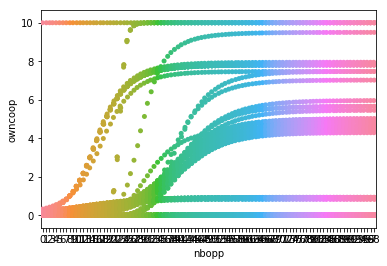

In [14]:
sns.stripplot(x='nbopp', y='owncoop', data=df.query('othercoop == 0 and cost == 0'))

In [12]:
df.query('othercoop == 0 and cost == 0')

,ind,cost,nbopp,owncoop,othercoop,score
0,0,0,0,0.000212,0.0,-1.000000
21,0,0,1,0.000234,0.0,-1.000000
42,0,0,2,0.000258,0.0,-1.000000
63,0,0,3,0.000285,0.0,-1.000000
84,0,0,4,0.000315,0.0,-1.000000
105,0,0,5,0.000348,0.0,-1.000000
126,0,0,6,0.000387,0.0,-1.000000
147,0,0,7,0.000430,0.0,-1.000000
168,0,0,8,0.000479,0.0,-1.000000
189,0,0,9,0.000535,0.0,-1.000000
